<a href="https://colab.research.google.com/github/christianasb/Bank-Marketing-Logistic-Regression-Model/blob/main/Bank_Marketing_Campaign_Logistic_Regression_%26_Profit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Marketing Campaign Logistic Regression & Profit Analysis**

**Task:** Predict whether a client will subscribe to a term deposit based on features from a Portuguese bank's direct marketing campaign, in order to improve outreach efficiency and maximize profit.

**Data Extraction**
- Load customer and marketing campaign data from a **CSV file** using **pandas**

**Exploratory Analysis**
- Examine data types, records, null values, and variable distributions

**Preprocessing**
- Convert categorical variables into numerical format
- Separate target variable from feature variables
- Scale data
- Split data into **training** and **testing** sets.

**Statistical Modeling**
- Train a **logistic regression model** using **scikit-learn**
- Convert model coefficients to **odds ratios** for business interpretation
- Use **statsmodels** to review **p-values** and identify statistically significant predictors

**Model Evaluation**
- Evaluate model performance using **classification reports** to compare **accuracy**, **precision**, and **recall** on training and testing data
- Visualize **confusion matrix** to compare predicted vs. actual outcomes
- Plot **learning curve** and **precision-recall curve**
- Determine **optimal classification threshold**

**Profit Analysis**
- Calculate **expected profit** based on **\$300** revenue per subscriber and **$20** cost per contact
- Estimate number of customers to contact to meet a **\$300,000** profit target
- Calculate expected profit per **1,000** customers contacted

**Business Recommendations**
- Recommend targeted outreach strategies to reduce costs and improve ROI



**Data Source:** http://archive.ics.uci.edu/dataset/222/bank+marketing

## **Importing Libraries & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

#reading in CSV from my Google Drive sharable link

data_url="https://drive.google.com/file/d/1h3HoUslRLAGAKXNp8L1ElLTqAO-iw4ax/view?usp=sharing"
file_id = data_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
bank = pd.read_csv(csv_raw, sep=';') # reading CSV with delimiter

## **Exploratory Analysis**

In [2]:
#previewing dataset

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#looking at data types, variables, records, null values

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#checking for missing values

bank.isnull().any()

,0
age,False
job,False
marital,False
education,False
default,False
balance,False
housing,False
loan,False
contact,False
day,False


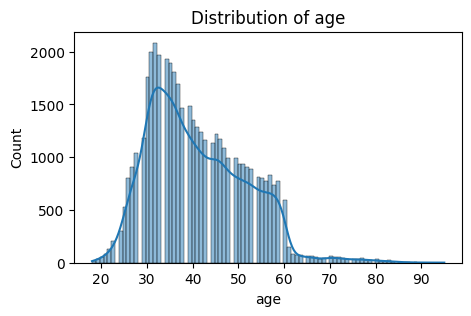

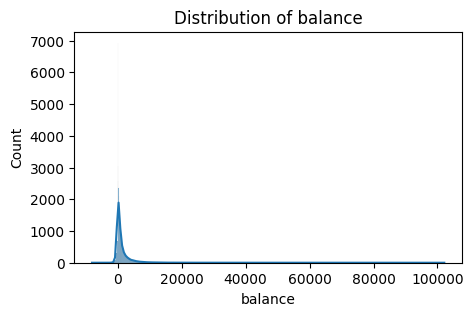

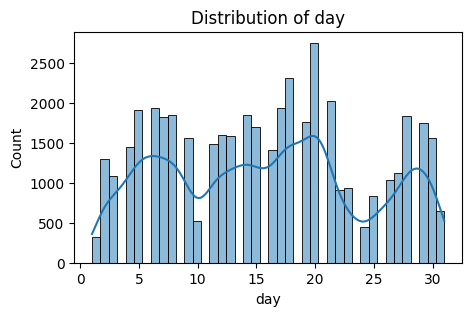

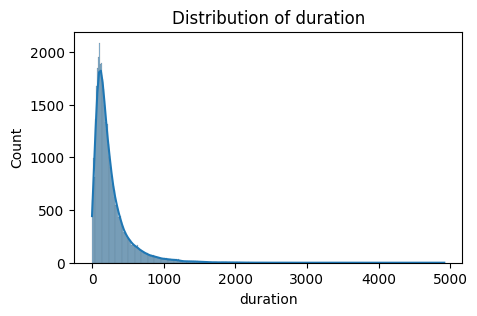

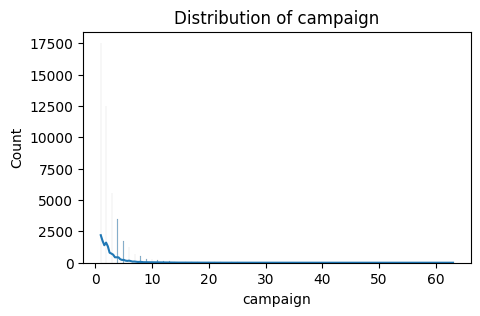

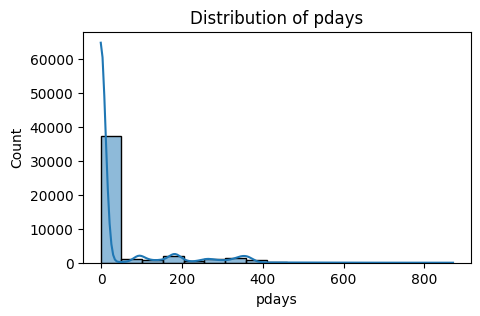

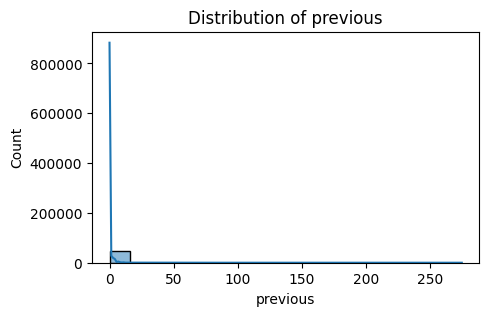

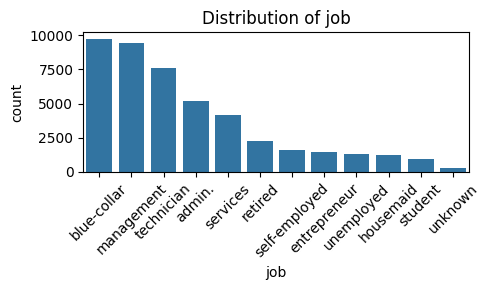

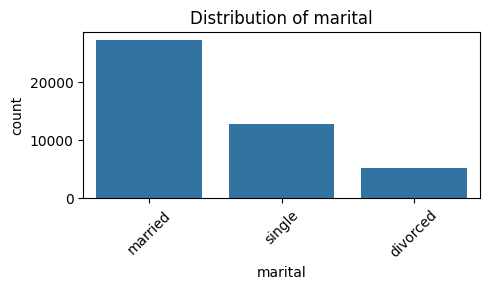

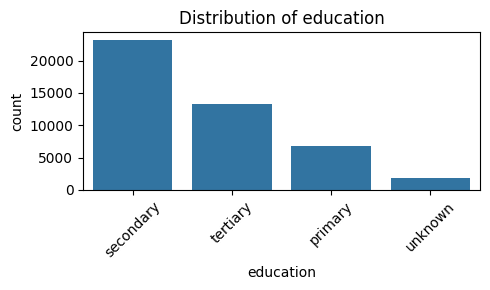

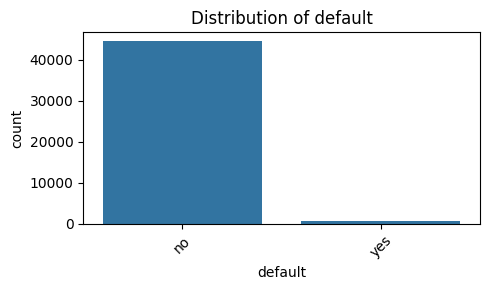

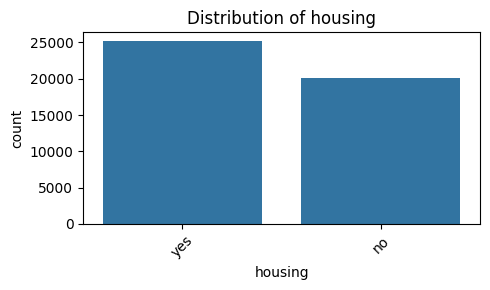

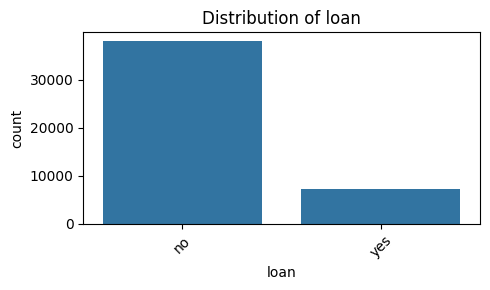

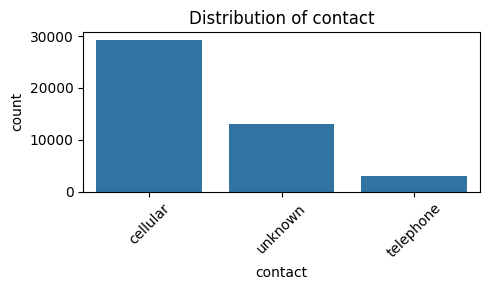

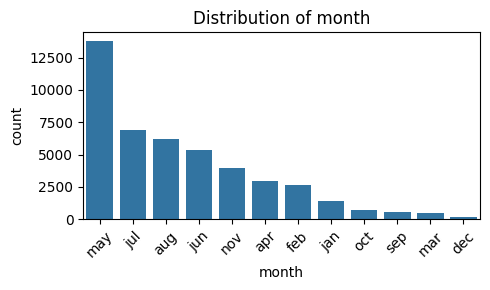

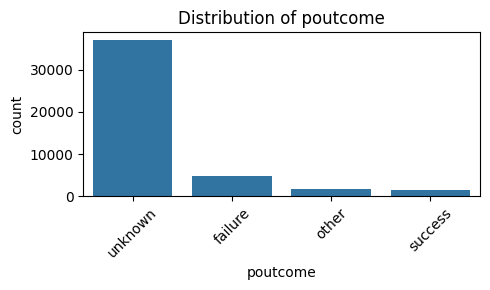

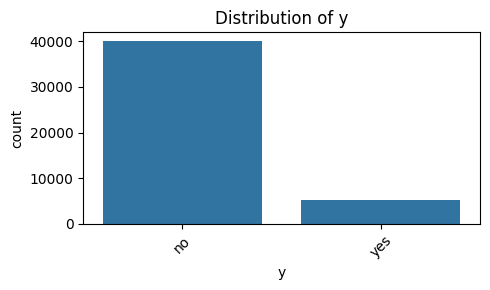

In [5]:
#examining variable distributions

numeric_cols = bank.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = bank.select_dtypes(include='object').columns

for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=bank, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=bank, x=col, order=bank[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##**Preprocessing**

In [6]:
#separating numerical and categorical variables

numerical =['age', 'balance', 'day', 'duration','campaign','pdays', 'previous']
categorical =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [7]:
#statistical summary of numerical data

bank[numerical].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#checking unique values for each categorical variable

print("job:", bank['job'].unique())
print("marital:", bank['marital'].unique())
print("education:", bank['education'].unique())
print("default:", bank['default'].unique())
print("housing:", bank['housing'].unique())
print("loan:", bank['loan'].unique())
print("contact:", bank['contact'].unique())
print("month:", bank['month'].unique())
print("poutcome", bank['poutcome'].unique())
print("y:", bank['y'].unique())

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [9]:
#creating dummies for categorical variables with more than 2 outcomes

categorical_dummies= ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
bank = pd.get_dummies(data = bank, columns= categorical_dummies, drop_first= True)

In [10]:
#converting binary categorical variables

dict_default={'yes': 1, 'no':0}
dict_housing={'yes': 1, 'no':0}
dict_loan={'yes': 1, 'no':0}
dict_y={'yes': 1, 'no':0}

bank['default']=bank.default.map(dict_default)
bank['housing']=bank.housing.map(dict_housing)
bank['loan']=bank.loan.map(dict_loan)
bank['y']=bank.y.map(dict_y)

In [11]:
#examining updated dataset

bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [12]:
#checking updated data types and null values

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  bool 
 12  job_entrepreneur     45211 non-null  bool 
 13  job_housemaid        45211 non-null  bool 
 14  job_management       45211 non-null  bool 
 15  job_retired          45211 non-null  bool 
 16  job_self-employed    4

In [13]:
#separating target variable from feature variables

y= bank['y']
X= bank.drop(columns = ['y'])

In [14]:
#scaling data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # imported with the libraries, we give it an alias here
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [15]:
#splitting data into 70% train and 30% test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1,stratify=y)

##**Logistic Regression Model**

In [16]:
#fitting the model

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train, y_train);

In [17]:
#previewing predicted probabilities for positive class (subscription = 1)

y_pred_probs = log.predict_proba(X_test)[:, 1]
print("First 10 predicted probabilities:", y_pred_probs[:10])

First 10 predicted probabilities: [0.03822382 0.18688537 0.05566262 0.01757924 0.01240123 0.02274386
 0.57924653 0.02425112 0.00142073 0.01531635]


In [18]:
import statsmodels.api as sm

# Finding coefficients of regression (log odds)
coef_log = log.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Log Odds': coef_log})

# Converting log odds to simple odds
odds = np.exp(coef_log)
odds_df = pd.DataFrame({'Feature': X.columns, 'Odds': odds})
odds_df = odds_df.sort_values(by='Odds', ascending=False)
print("Odds Ratios:")
print(odds_df)

# --- STATSMODELS OUTPUT FOR P-VALUES ---
# Adding intercept to X_train
X_train_sm = sm.add_constant(X_train)

# Fitting logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Printing summary
print("Logistic Regression Summary:")
print(result.summary())

Odds Ratios:
                Feature      Odds
6              duration  2.996926
40     poutcome_success  1.533005
24   education_tertiary  1.192528
34            month_mar  1.179800
33            month_jun  1.174045
38            month_sep  1.118180
37            month_oct  1.114686
23  education_secondary  1.110156
14          job_retired  1.095215
5                   day  1.068842
17          job_student  1.066622
22       marital_single  1.052543
25    education_unknown  1.050688
8                 pdays  1.050005
39       poutcome_other  1.049704
29            month_dec  1.046087
2               balance  1.032891
41     poutcome_unknown  1.021449
9              previous  1.011215
1               default  0.987871
30            month_feb  0.976879
19       job_unemployed  0.976302
20          job_unknown  0.974530
13       job_management  0.972542
0                   age  0.972349
18       job_technician  0.957731
11     job_entrepreneur  0.950308
15    job_self-employed  0.949692
2

**Features with notable positive affect on subscription rate**
- duration
- poutcome_success
- education_tertiary
- month_mar
- month_jun
- month_sep
- month_oct
- education_secondary

###**Key Model Insights**

**Model Fit:**
- The **pseudo R-squared** is **0.344,** meaning the model explains about **34.4%** of the variation in term deposit subscription behavior.
- The **LLR p-value < 0.001** confirms the overall model is statistically significant.

**Statistical Significance:**
- Many variables such as poutcome_success, education_tertiary, month_mar, and job_retired have **p-values < 0.01**, confirming strong, reliable associations.
- Variables with a **p-value > 0.05** like age, pdays, and default were not statistically significant and may be excluded in future streamlined models.

**Positive Predictors:**
- **Call duration** has the largest effect, with an **odds ratio** of approximately **3.00**, indicating that each unit increase in call duration nearly **triples** the odds of subscription, holding all else constant. However, it should be excluded from real-time prediction models because it is only known post-call.
- A **successful outcome in a previous campaign** makes customers **1.53 times** more likely to subscribe compared to those with no prior success, highlighting the value of retargeting engaged leads.
- **Higher education levels** are strong indicators of interest:
  - Customers with a tertiary degree are **1.19 times** more likely to subscribe.
  - Those with secondary education are **1.11 times** more likely to respond positively.
- **Timing of outreach** plays a key role. Contacting customers in **March, June, September, or October** increases the odds of subscription by **10–18%**, suggesting these months align with higher consumer openness or better financial timing.

**Negative Predictors:**
- Customers with a **housing loan** are **29%** less likely to subscribe (**odds ratio ≈ 0.71**), possibly due to pre-existing financial obligations.
- Having a **personal loan** also reduces the odds of subscription by about **14%**, further supporting the idea that debt burden decreases product receptiveness.
- Contacting customers in **July or August** reduces the likelihood of success by over **20%** (**odds ratios ≈ 0.73 and 0.78**, respectively), which could reflect summer vacation behavior or disengagement during those months.
- Using an **unknown communication channel** is highly ineffective — it makes a customer more than **50%** less likely to subscribe (**odds ratio ≈ 0.48**), suggesting clear and trusted contact methods are essential.

**Strategic Recommendations:**
- Prioritize customers with a history of engagement, especially those who responded positively to past campaigns.
- Target educated segments, especially those with tertiary education, as they have a higher likelihood of subscribing.
- Schedule outreach in high-performing months like March, June, September, and October for greater effectiveness.
- Avoid peak summer/vacation months (e.g., July, August) and unknown contact methods, which show lower success rates.
- Consider excluding non-significant variables (e.g., age, default) to simplify the model and reduce noise.

##**Model Evaluation**

In [19]:
#creating function to print classification report and confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score

def metrics_score(actual, predicted):
    print("Classification Report:\n")
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(5.5,3.5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Subscribe', 'Subscribe'], yticklabels=['Not Subscribe', 'Subscribe'], cmap= 'Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27945
           1       0.66      0.36      0.46      3702

    accuracy                           0.90     31647
   macro avg       0.79      0.67      0.70     31647
weighted avg       0.89      0.90      0.89     31647



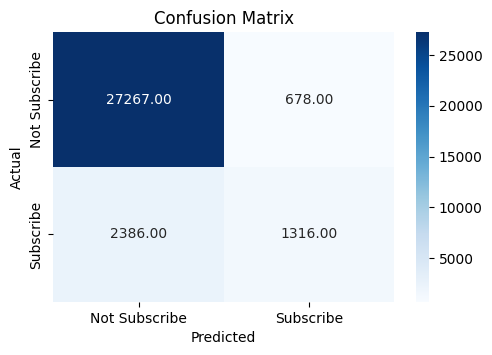

In [20]:
#performance on training data

y_pred_train_log = log.predict(X_train)
metrics_score(y_train, y_pred_train_log)

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.64      0.34      0.44      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



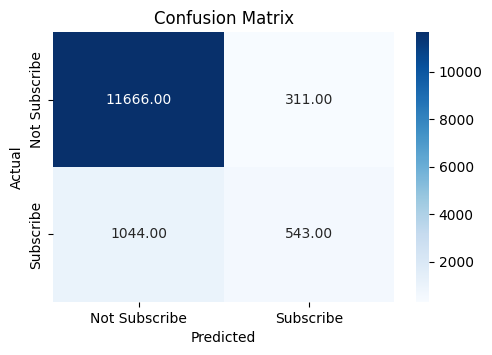

In [21]:
#performance on testing data

y_pred_test_log = log.predict(X_test)
metrics_score(y_test, y_pred_test_log)

**Comparing training and testing results**
- The model has an overall **accuracy** of **90%** on both training and test data, meaning it correctly classifies the majority of cases. However, the **recall** for class 1 (customers who subscribe to the term deposit) is low, around **0.36** for training and **0.34** for testing, indicating that the model struggles to identify many actual subscribers.
- They perform similarly. Both have an **accuracy** of **90%** and a **recall** around **0.35**. The precision and recall values for class 1 are slightly lower in the test set, but the overall trends remain consistent, suggesting that the model generalizes well.
- **Overfitting** does not appear to be a major concern because the model’s performance is similar on both training and testing data. If overfitting were present, we would expect much higher performance on the training set compared to the test set. Since accuracy, precision, and recall are nearly the same for both, the model generalizes well.

**Interpreting precision and recall values for class 1**
- **Recall (34-36%):** This means that the model correctly identifies only about **34-36%** of the actual subscribers (clients who truly sign up for the term deposit). A low recall indicates that the model fails to recognize many potential customers who would have subscribed. In a business sense, this translates to missed revenue opportunities, as many interested clients may not be targeted with follow-up efforts.
- **Precision (64-66%):** This means that when the model predicts a client will subscribe, it is correct about **64-66%** of the time. However, **34-36%** of those predicted as subscribers do not actually subscribe. This could lead to wasted marketing resources, as the bank may spend unnecessary time and effort on follow-up calls or promotional efforts for clients who are unlikely to convert.

###**Learning Curve**

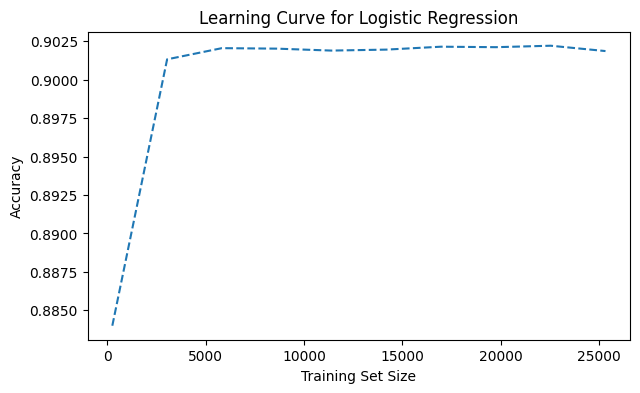

In [22]:
#creating a learning curve

from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores_log, test_scores_log = learning_curve(
    LogisticRegression(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 10), scoring='accuracy'
    )
test_mean_log = np.mean(test_scores_log, axis=1)
plt.figure(figsize=(7, 4))
plt.plot(train_sizes_abs, test_mean_log, linestyle='--')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.show()

**Interpreting learning curve**
- The performance of the logistic regression model improves sharply with the initial increase in training data, reaching a high accuracy level early on. As more training data is added, its performance stabilizes, indicating that it effectively generalizes to new data and does not suffer significantly from overfitting or high variance.

###**Precision-Recall Curve**

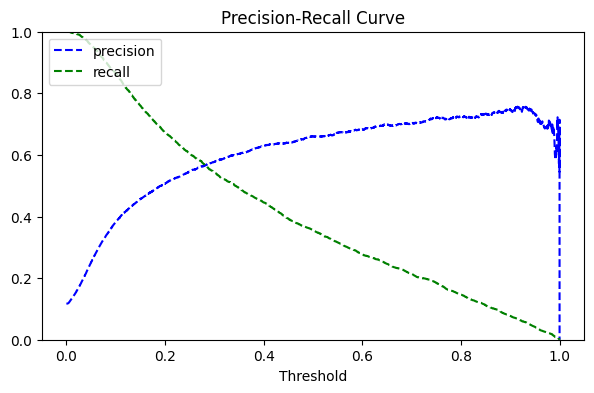

In [23]:
#creating precision-recall curve

y_scores_log=log.predict_proba(X_train)
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train, y_scores_log[:,1])

plt.figure(figsize=(7,4))
plt.plot(thresholds_log, precisions_log[:-1], 'b--', label='precision')
plt.plot(thresholds_log, recalls_log[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.title("Precision-Recall Curve")
plt.ylim([0,1])
plt.show()

In [24]:
#solving for exact threshold where precision = recall

diff = np.abs(precisions_log - recalls_log)
equal_idx = np.argmin(diff)
optimal_threshold = thresholds_log[equal_idx]

print(f"Threshold where precision ≈ recall: {optimal_threshold:.2f}")

Threshold where precision ≈ recall: 0.28


**Interpreting precision-recall curve**

- Precision and recall are balanced at a threshold of **0.28.** This means any customer with a predicted probability of 28% or higher of subscribing will be classified as a subscriber & will be sent the marketing compaign and those with a probability less than 28% will be classified as non-subscribers & will not be targeted. This is the optimal threshold where there is the most reasonable trade-off between correctly identifying actual subscribers (recall) and minimizing false positive (precision).

###**Performance at Optimal Threshold**

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     27945
           1       0.57      0.57      0.57      3702

    accuracy                           0.90     31647
   macro avg       0.75      0.75      0.75     31647
weighted avg       0.90      0.90      0.90     31647



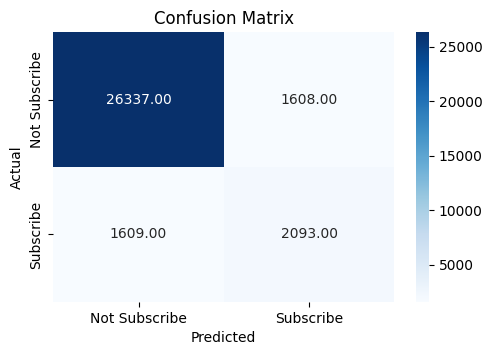

In [25]:
#performance on training data

y_pred_train = log.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11977
           1       0.57      0.56      0.57      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.75      0.75     13564
weighted avg       0.90      0.90      0.90     13564



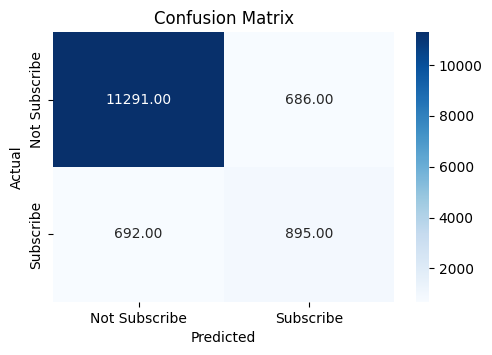

In [26]:
#performance on testing data

y_pred_test = log.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Interpreting model performance at optimal threshold of 0.28**

- The training and testing data perform similarly, indicating it generalizes well to unseen data. This suggests there is no overfitting in the model, meaning it has effectively learned patterns in the data.
- Lowering the threshold to **0.28** has **increased recall** for the positive class from **0.36 to 0.57** in training and from **0.34 to 0.56** in testing. This means the model is now identifying more actual subscribers, which is beneficial because the bank's goal is to maximize customer engagement. However, the **precisio** for the positive class **dropped** from about **0.65 to 0.57** in the training & testing data, meaning a larger portion of the predicted subscribers will not actually subscribe. While the increase in recall means that the bank will reach more potential subscribers, the decline in precision means that some marketing resources may be wasted on clients who are unlikely to subscribe. This trade-off is acceptable because here we prioritize recall.
- The model maintains a high overall **accuracy** of **90%**, indicating strong model performance. A recall of **56%** suggests that the model is successfully capturing **more than half** of the true subscribers, improving the bank's ability to target the right clients. However, it also means that **44%** of actual subscribers are still being missed, so further optimization may be necessary if the bank wants to reduce lost opportunities.

##**Profit Analysis**

In [27]:
#building function to calculate expected value of profit

def calculate_expected_profit_from_confusion_matrix(
    true_positive, false_positive, false_negative, true_negative,
    profit_true_positive, loss_false_positive, loss_false_negative, profit_true_negative):

    total_observations = true_positive + false_positive + false_negative + true_negative

    proportion_predicted_positive = (true_positive + false_positive) / total_observations
    proportion_predicted_negative = (false_negative + true_negative) / total_observations

    # Within predicted positive (pp) group:
    probability_actual_positive_given_pp = true_positive / (true_positive + false_positive)
    probability_actual_negative_given_pp = false_positive / (true_positive + false_positive)

    # Within predicted negative (pn) group:
    probability_actual_negative_given_pn = true_negative / (false_negative + true_negative)
    probability_actual_positive_given_pn = false_negative / (false_negative + true_negative)

    # Expected profit from each group
    expected_profit_from_predicted_positive = (
        proportion_predicted_positive *
        (
            probability_actual_positive_given_pp * profit_true_positive +
            probability_actual_negative_given_pp * loss_false_positive
        )
    )

    expected_profit_from_predicted_negative = (
        proportion_predicted_negative *
        (
            probability_actual_negative_given_pn * profit_true_negative +
            probability_actual_positive_given_pn * loss_false_negative
        )
    )

    # Total expected profit
    total_expected_profit = expected_profit_from_predicted_positive + expected_profit_from_predicted_negative

    return total_expected_profit

###**Example Scenario Metrics:**
- Cost of contacting a customer: **$20**
- Profit if customer subscribes: **\$300**

In [28]:
# Predicted probabilities
y_scores = log.predict_proba(X_test)[:, 1]
threshold = optimal_threshold
y_pred_labels = (y_scores > threshold).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Example profit/loss values
profit_true_positive = 300    # Profit for correctly identifying a subscriber
loss_false_positive = -20     # Cost of targeting a non-subscriber
loss_false_negative = 0       # No profit or loss from missing a subscriber
profit_true_negative = 0      # No profit or loss from ignoring a non-subscriber

# Calculating expected profit
expected_profit = calculate_expected_profit_from_confusion_matrix(
    true_positive, false_positive, false_negative, true_negative,
    profit_true_positive, loss_false_positive, loss_false_negative, profit_true_negative
)

print(f"Expected Profit: ${expected_profit:.2f}")

Expected Profit: $18.78


The **expected profit** from **each customer** reached is **$18.78**.

In [29]:
# Calculating classification rates
total = len(y_test)

true_negative_rate = true_negative / total
true_positive_rate = true_positive / total
false_negative_rate = false_negative / total
false_positive_rate = false_positive / total

# Combining into a DataFrame
import pandas as pd

classification_rates = pd.DataFrame([{
    'True Negative Rate': true_negative_rate,
    'True Positive Rate': true_positive_rate,
    'False Negative Rate': false_negative_rate,
    'False Positive Rate': false_positive_rate
}])

print("Classification Rates:")
classification_rates

Classification Rates:


,True Negative Rate,True Positive Rate,False Negative Rate,False Positive Rate
0,0.832424,0.065983,0.051017,0.050575


### **Interpreting Profit Drivers from Model Performance**

**Factors that increase the expected profit:**
- **Higher True Positive Rate:** correctly identifying more customers who will subscribe increases profit.
  - Here, only **6.6%** of actual subscribers were correctly identified. This is quite low, so increasing it would lead to more effective targeting and higher conversion-driven revenue.
- **Lower False Positive Rate:** reducing the number of customers incorrectly targeted (who don't subscribe) minimizes marketing losses/costs.
  - **5.1%** of non-subscribers were wrongly predicted as likely to subscribe. Lowering this rate would reduce wasted marketing resources on unlikely leads.
- **Higher True Negative Rate:** correctly identifying non-subscribers helps avoid unnecessary contact costs.
  - The True Negative Rate is **83.2%**, meaning the model correctly avoided targeting the vast majority of uninterested customers. Maintaining or improving this helps conserve resources and improve efficiency.
- **Decreasing the Optimal Threshold** to capture more potential subscribers/revenue.
  - Lowering the decision threshold would likely increase the True Positive Rate, capturing more potential subscribers. However, this could also increase the False Positive Rate, so it must be balanced carefully.

**Factors that decrease the expected profit:**
- **Lower True Positive Rate:** missing out on customers who will subscribe, resulting in less profits.
- **Higher False Positive Rate:** more customers incorrectly classified as likely to subscribe increases marketing costs/wastes resources.
- **Higher False Negative Rate:** missing potential subscribers again reduces overall revenue opportunities.
  - **5.1%** of actual subscribers were wrongly predicted as non-subscribers and not targeted. This results in lost sales from customers who likely would have subscribed if contacted.

###**Scaling up to Business Objective**
If the bank wanted to make **$300,000** in **profit** from the marketing campaign, the amount of customers needed to be targeted:

In [30]:
import math
target_profit = 300000
customers_needed = math.ceil(target_profit / expected_profit)
print(f"To earn ${target_profit}, you need to contact {customers_needed} customers.")

To earn $300000, you need to contact 15972 customers.


**Profit** per **1,000 customers**:

In [31]:
expected_profit_per_1000 = expected_profit * 1000
print(f"Expected Profit per 1,000 customers: ${expected_profit_per_1000:.2f}")

Expected Profit per 1,000 customers: $18783.54


###**Cost, Profit, and Revenue Summary**

In [32]:
# Estimating Business Impact of Targeting All Customers in Training Data

# Total number of customers in the training set
total_customers = len(y_train)
print(f"Total customers to be contacted: {total_customers}")

# Number of actual subscribers in the training set (class = 1)
num_subscribers = y_train.value_counts()[1]
print(f"Number of actual subscribers: {num_subscribers}", "\n")

# Perent of customers who actually subscribe
percent_actual_subscribers = (num_subscribers / total_customers) * 100
percent_actual_subscribers = round(percent_actual_subscribers, 2)
print(f"% of actual subscribers: {percent_actual_subscribers}%")

# Cost and profit assumptions
cost_per_customer = 20
revenue_per_subscriber = 300

# Total cost to contact all customers
total_contact_cost = total_customers * cost_per_customer
print(f"Cost of contacting all customers: ${total_contact_cost}")

# Total revenue from actual subscribers
total_revenue = num_subscribers * revenue_per_subscriber
print(f"Total revenue from subscribers: ${total_revenue}")

# Net profit = revenue - cost
net_profit = total_revenue - total_contact_cost
print(f"Estimated profit (revenue - cost): ${net_profit}")

Total customers to be contacted: 31647
Number of actual subscribers: 3702 

% of actual subscribers: 11.7%
Cost of contacting all customers: $632940
Total revenue from subscribers: $1110600
Estimated profit (revenue - cost): $477660


**Interpreting Cost, Profit, and Revenue**

Although the campaign results in a positive **net profit** of **$477,660**, it is relatively inefficient, as only **11.7%** of contacted customers actually subscribe. This means **88.3%** of the bank’s outreach cost does not directly generate revenue, leading to a high customer acquisition cost.

To improve profit margins, the bank should:
- Target more precisely using the predictive model to prioritize likely subscribers and reduce unnecessary outreach costs.
- Explore lower-cost contact methods (e.g., email or SMS) instead of expensive phone calls.
- Consider adjusting the classification threshold to balance false positives and false negatives in a way that maximizes expected profit, not just accuracy.

##**Business Recommendations**

**Refine targeting to improve profit margins:**
- Only **11.7%** of customers subscribed when contacted at random (3,702 out of 31,647), meaning **88.3%** of marketnig spend didn't yield a return. This led to a total cost of **\$632,940** but just **\$1,110,600** in revenue. Using the logistic regression model to target high-probability customers can significantly reduce unnecessary outreach and increase ROI.

**Focus outreach on top predictors of conversion:**
- A one-unit increase in **call duration** nearly **triples** the odds of subscription (odds ratio ≈ 3.00), but since duration is only known post-call, it should be excluded from real-time targeting.
- Customers with **prior campaign success** were **1.53x** more likely to subscribe—these individuals should be prioritized.
- Those with **tertiary education** are **1.19x** more likely to subscribe, and those with **secondary education** are **1.11x** more likely—education-based segmentation can guide personalized messaging.

**Schedule calls during high-performing months:**
- Contacts made in **March**, **June**, **September**, and **October** yielded higher conversion odds. Concentrating outreach during these months may increase success rates without increasing costs.

**Avoid low-performing segments to reduce waste:**
- Customers with **housing loans** or **personal loans** were less likely to subscribe, likely due to financial constraints.
- Outreach in **July** and **August** had low effectiveness.
- Using **unknown communication channels** should be avoided if possible.

**Optimize threshold for business goals:**
- At the default threshold (0.5), the model missed many true subscribers. Lowering the threshold to **0.28** increased the expected profit by identifying more potential subscribers, despite slightly increasing false positives. This trade-off was worthwhile given the **\$300** profit per subscriber vs. **$20** cost per contact.

**Refine model by removing statistically insignificant variables:**
- Several predictors (e.g., default, job_management, poutcome_unknown) had high p-values, indicating they may not meaningfully contribute to subscription prediction. Removing them can **simplify the model**, **reduce noise**, and **improve generalization.**

**Tier contact strategy by predicted probability:**
- Use the model's predicted probabilities to guide outreach strategy
  - **High-probability leads (>0.5):** Use phone calls to maximize conversions.
  - **Medium-probability leads (0.3–0.5):** Use lower-cost channels like email or SMS.
  - **Low-probability leads (<0.3):** Avoid contacting unless further data justifies outreach.

